In [1]:
%load_ext autoreload
%autoreload 2
%cd '/home/xingyu/Projects/PlasticineLab'
%pwd
%matplotlib inline
import matplotlib.pyplot as plt
import taichi as ti
import numpy as np
import cv2
import os
from imitation.env_spec import set_render_mode
from plb.utils.visualization_utils import save_rgb

os.environ["CUDA_VISIBLE_DEVICES"] = "1"
np.random.seed(0)
from plb.envs.multitask_env import MultitaskPlasticineEnv

env = MultitaskPlasticineEnv(cfg_path=f'gather_move.yml', generating_cached_state=True)
taichi_env = env.taichi_env

/home/xingyu/Projects/PlasticineLab
[Taichi] mode=release
[Taichi] preparing sandbox at /tmp/taichi-0zyxec07
[Taichi] version 0.7.26, llvm 10.0.0, commit e37bdb5e, linux, python 3.8.5
[Taichi] Starting on arch=cuda
[Tina] version 0.1.1
[Tina] Taichi properties hacked
pimirives: num primitive: 3
Building primitive
action:
  dim: 7
  scale: (0.015, 0.0, 0.015, 0.0, 0.0, 0.1, 0.03)
collision_group: [0.0, 0.0, 0.0]
color: (0.7568, 0.6039, 0.4196)
friction: 1.0
init_gap: 0.4
init_pos: (0.7, 0.06, 0.5)
init_rot: (0.5, 0.5, -0.5, 0.5)
lower_bound: (0.0, 0.0, 0.0)
maximal_gap: 1.0
minimal_gap: 0.05
round: 0
shape: Gripper
size: (0.015, 0.09, 0.05)
upper_bound: (1.0, 1.0, 1.0)
variations: None
Building primitive
action:
  dim: 6
  scale: (0.01, 0.01, 0.0, 0.0, 0.0, 0.05)
collision_group: [0, 0, 1]
color: (0.7568, 0.6039, 0.4196)
friction: 50.0
init_pos: (0.7, 0.01, 0.5)
init_rot: (0.707, 0.707, 0.0, 0.0)
lower_bound: (0.0, 0.0, 0.0)
shape: Box
size: (0.07, 0.07, 0.02)
upper_bound: (1.0, 1.0, 1.

 n


Env reset: No initial state during cache generation
Generating target, skipping setting emd
emd after reset: 0.0
======================WARNING: contact loss mask not set================


Env reset: No initial state during cache generation
Generating target, skipping setting emd
emd after reset: 0.0
======================WARNING: contact loss mask not set================
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
<tina.mesh.trans.MeshTransform object at 0x7f15f050cb50> [[ 1.    0.    0.    0.  ]
 [ 0.    1.    0.   -0.38]
 [ 0.    0.    1.    0.8 ]
 [ 0.    0.    0.    1.  ]]
[-0.08       -0.38        0.08000004]
[1.12 0.   0.88]
[[ 1.          0.          0.          0.33000001]
 [ 0.          0.         -1.          0.05      ]
 [ 0.          1.          0.          0.5       ]
 [ 0.          0.          0.          1.        ]]
<tina.mesh.trans.MeshTransform object at 0x7f15f0528e50> [[-2.77555756e-17  6.59194921e-17  1.00000000e+00 -1.41820000e-02]
 [-1.00000000e+00  2.35922393e-16  1.66533454e-16 -2.77555756e-16]
 [ 8.32667268e-17 -1.00000000e+00 -1.04083409e-17  7.89600000e-03]
 [-5.55111512e-17 -5.55111512e-17  1.11022302e-16  1.00000000e+00]]
[

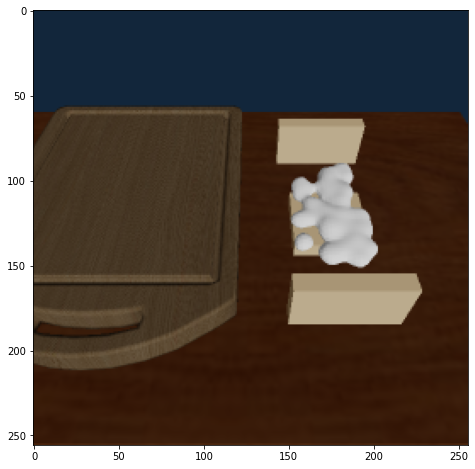

Env reset: No initial state during cache generation
Generating target, skipping setting emd
emd after reset: 0.0
======================WARNING: contact loss mask not set================


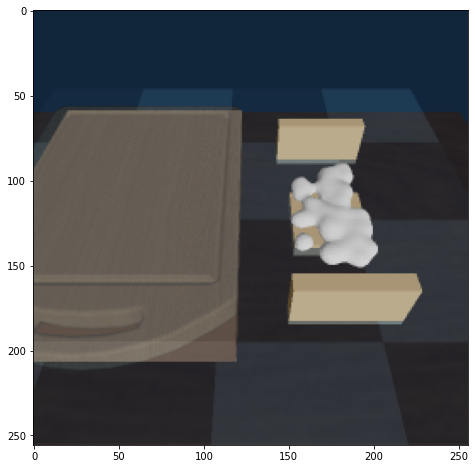

In [3]:
plt.figure(figsize=(8, 8))

set_render_mode(env, 'GatherMove-v1', 'mesh')
env.reset()
for _ in range(10):
    env.step(np.array([0] * 13))  # Wait for dough to drop
env.taichi_env.renderer.verbose=True
img1 = env.taichi_env.render(mode='rgb', img_size=256)[:, :, :3]
plt.imshow(img1)
plt.show()

plt.figure(figsize=(8, 8))
set_render_mode(env, 'GatherMove-v1', 'primitive')
env.reset()
for _ in range(10):
    env.step(np.array([0] * 13))  # Wait for dough to drop
img2 = env.taichi_env.render(mode='rgb', img_size=256)[:, :, :3]
plt.imshow(img1*0.5 + img2*0.5)
# plt.imshow(img2)
plt.show()

Env reset: No initial state during cache generation
Generating target, skipping setting emd
emd after reset: 0.0
======================WARNING: contact loss mask not set================
Env reset: No initial state during cache generation
Generating target, skipping setting emd
emd after reset: 0.0
======================WARNING: contact loss mask not set================
Env reset: No initial state during cache generation
Generating target, skipping setting emd
emd after reset: 0.0
======================WARNING: contact loss mask not set================
Env reset: No initial state during cache generation
Generating target, skipping setting emd
emd after reset: 0.0
======================WARNING: contact loss mask not set================
Env reset: No initial state during cache generation
Generating target, skipping setting emd
emd after reset: 0.0
======================WARNING: contact loss mask not set================
Env reset: No initial state during cache generation
Generating target,

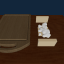

In [4]:
import lzma
import pickle
import numpy as np
import os
from plb.utils.visualization_utils import save_numpy_as_gif
set_render_mode(env, 'GatherMove-v1', 'mesh')
N = 100
xs = np.linspace(0.4, 0.42, N)
img_size = 64

def randomize_tool_state(cfg, box_min_x, pin_min_y):
    pos = eval(cfg.PRIMITIVES[0]['init_pos'])
    height = np.random.rand() * 0.1
    x_shift = np.random.rand() * 0.1 - 0.1
    cfg.PRIMITIVES[0]['init_pos'] = (pos[0] + x_shift, float(pin_min_y + height), pos[2])


def case1(cfg):  # Scattered
    cfg.SHAPES[0]['seed'] = i


target_id = 0
target_imgs = []
target_path = os.path.join(env.cfg.cached_state_path, 'init')

def save_state():
    global target_id
    img = taichi_env.render(mode='rgb', img_size=img_size)
    state = taichi_env.get_state()
    state_name = os.path.join(target_path, f'state_{target_id}.xz')
    with lzma.open(state_name, 'wb') as f:
        pickle.dump(state, f, protocol=4)
    save_rgb(os.path.join(target_path, f'state_{target_id}.png'), np.array(img[:, :, :3]).astype(np.float32))
    target_id += 1
    target_imgs.append(img)


gifpath = os.path.join(target_path, 'vis_all.gif')
for case_id, case in enumerate([case1]):
    for i in range(N):
        env.reset(target_cfg_modifier=case)
        for _ in range(10):
            env.step(np.array([0] * 13))  # Wait for dough to drop
        save_state()
        for j in range(25):
            action = np.array([0] * 7 + [0.] * 6)
            action[6] = ((j < 15) - 0.5) * 2
            env.step(action)
        taichi_env.primitives[0].set_state(0, [0.7, 0.06, 0.5, 0.707, 0.707, 0., 0., 0.4])
        for j in range(25):
            action = np.array([0] * 7 + [0.] * 6)
            action[6] = ((j < 15) - 0.5) * 2
            env.step(action)
        taichi_env.primitives[0].set_state(0, [0.7, 0.06, 0.5, 0.5, 0.5, -0.5, 0.5, 0.4])
        save_state()
target_imgs = np.array(target_imgs)
target_imgs = np.concatenate([target_imgs[::2, :, :, :3],
                              target_imgs[1::2, :, :, :3]])
save_numpy_as_gif(target_imgs, gifpath)
from IPython.display import Image

Image(gifpath)

Env reset: No initial state during cache generation
Generating target, skipping setting emd
emd after reset: 0.0
======================WARNING: contact loss mask not set================


100%|██████████| 180/180 [00:58<00:00,  3.07it/s]


MoviePy - Building file data/env_modeling/gather.gif with imageio.


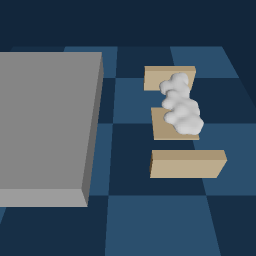

In [5]:
# Test a gripping and lifting motion
from plb.utils.visualization_utils import save_numpy_as_gif
import numpy as np
from IPython.display import Image
from tqdm import tqdm

filename = 'data/env_modeling/gather.gif'
img_size = 256
env.reset()
frames, actions = [], []
for i in range(25):
    action = np.array([0] * 7 + [0.] * 6)
    action[6] = ((i < 10) - 0.5) * 2
    actions.append(action)

for i in range(30):
    action = np.array([0] * 7 + [0.] * 6)
    action[5] = 0.5
    actions.append(action)

for i in range(30):
    action = np.array([0] * 7 + [0.] * 6)
    action[6] = ((i < 20) - 0.5) * 2
    actions.append(action)

for i in range(25):
    action = np.array([0] * 7 + [0.] * 6)
    action[5] = -0.5
    actions.append(action)

for i in range(20):
    action = np.array([0] * 7 + [0.] * 6)
    action[6] = ((i < 10) - 0.5) * 2
    actions.append(action)

for i in range(15):
    action = np.array([0] * 7 + [0.] * 6)
    action[7 + 1] = 1.
    actions.append(action)

for i in range(20):  # Rotation
    action = np.array([0] * 7 + [0.] * 6)
    action[-1] = 0.5
    action[7] = -1
    actions.append(action)

for i in range(15):
    action = np.array([0] * 7 + [0.] * 6)
    action[7] = 0.5
    actions.append(action)

for action in tqdm(actions):
    env.step(action)
    frames.append(env.taichi_env.render(mode='rgb', img_size=img_size)[:, :, :3])
save_numpy_as_gif(np.array(frames), filename)
Image(filename)

